In [30]:
# import statements
from morse import Morse
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import rcParams

COLOUR1 = "firebrick"
COLOUR2 = "darkgreen"
COLOUR3 = "royalblue"
COLOUR4 = "rebeccapurple"
COLOUR5 = 'darkorchid'
COLOUR6 = 'olivedrab'

rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12

In [31]:
# global parameters
mA = 1.0
mB = 19.0

# parameters for ground state
X_morse_omega_wn = 4165.1570588584555
X_morse_omega_xe_wn = 115.73758535305562
X_r_eq_SI = 9.178507603174319e-11
X_Te = 0.

# parameters for excited state
D_morse_omega_wn = 3370.510408803543
D_morse_omega_xe_wn = 176.0443972578461
D_r_eq_SI = 9.750100896865223e-11
D_Te = 0.



In [32]:
# create Morse object for ground state
X = Morse(mA, mB, X_morse_omega_wn, X_morse_omega_xe_wn, X_r_eq_SI, X_Te)
#X.make_rgrid(n = 500, rmin=4e-11, rmax=5e-10)
#X.V = X.Vmorse(X.r)

# create Morse object for excited state
D = Morse(mA, mB, D_morse_omega_wn, D_morse_omega_xe_wn, D_r_eq_SI, D_Te)
#D.make_rgrid(n = 500, rmin=4e-11, rmax=5e-10)
#D.V = D.Vmorse(D.r)

# calculate psi_
_tmp = X.calc_psi_z(0)
X_psi0 = np.copy(X.psi_au)

_tmp = D.calc_psi_z(0)
D_psi0 = np.copy(D.psi_au)


 Did I get the values of rmin and rmax right?
3e-11 6e-10
 just formed self.r
 First point is  3e-11
 Last point is  6e-10
 Did I get the values of rmin and rmax right?
3e-11 6e-10
 just formed self.r
 First point is  3e-11
 Last point is  6e-10


In [34]:
data_dir = "/Users/jfoley19/Code/data_repository/Mapol/HF/"
file = data_dir + "hf_pes_35_states_only_singlets_300_points.npy"
# Load the first several singlet potential energy surfaces between r = 0.5 and r = 3.5 (300 points total)
pes = np.load(file)

# store r_data in Angstroms 
r_data = pes[:,0]

# conversion from Bohr to Angstroms
b2a = 0.52917721067121

# store ground-state PES data
X_data = pes[:,1]
# get minimum energy of X surface
X_min = np.min(X_data)

# store Delta surface PES data
D_data = pes[:,8]
# get minimum energy of D surface
D_min = np.min(D_data)



<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
/var/folders/5f/ftf5xlgj4dv_6xxqh_p9pwyc0000gq/T/ipykernel_99793/2232689560.py:1: SyntaxWarning: invalid escape sequence '\S'
  plt.plot(X.r_au * b2a, X.V_au + X_min, color=COLOUR3, label="X $^1 \Sigma^+$ Morse Fit")
/var/folders/5f/ftf5xlgj4dv_6xxqh_p9pwyc0000gq/T/ipykernel_99793/2232689560.py:2: SyntaxWarning: invalid escape sequence '\S'
  plt.plot(r_data[0:300:5], X_data[0:300:5], color=COLOUR3, linestyle="none", marker="o", ms="8", mfc="none", label="X $^1 \Sigma^+$ FCI/6-311++G**")


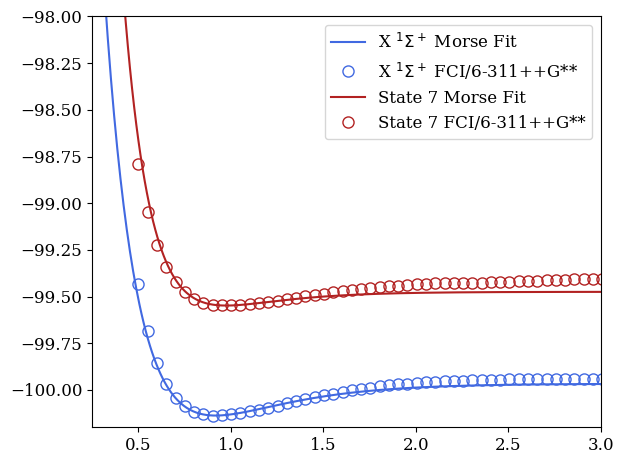

In [57]:
plt.plot(X.r_au * b2a, X.V_au + X_min, color=COLOUR3, label="X $^1 \Sigma^+$ Morse Fit")
plt.plot(r_data[0:300:5], X_data[0:300:5], color=COLOUR3, linestyle="none", marker="o", ms="8", mfc="none", label="X $^1 \Sigma^+$ FCI/6-311++G**")
plt.plot(X.r_au * b2a, D.V_au + D_min, color=COLOUR1, label="State 7 Morse Fit")
plt.plot(r_data[0:300:5], D_data[0:300:5], color=COLOUR1, linestyle="none", marker="o", ms="8", mfc="none", label="State 7 FCI/6-311++G**")
plt.ylim(-100.2, -98)
plt.xlim(0.25, 3)
plt.tight_layout()
plt.legend()
#plt.savefig("Ground_State_cc_pVDZ.png", dpi=200)
plt.show()